In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
dataset = pd.read_csv('../docs/insurance.csv')

## Tugas

In [3]:
#melihat data awal
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#mengecek ukuran data
dataset.shape


(1338, 7)

In [5]:
#melihat informasi data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#melihat deskripsi data
dataset.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Melakukan slicing data fitur dan melakukan encoding data 'sex' dan 'smoker'

In [7]:
# melakukan slicing data
dataset = dataset.drop(['region'], axis=1)

# melakukan encoding
le = LabelEncoder()
dataset.sex = le.fit_transform(dataset.sex)
dataset.smoker = le.fit_transform(dataset.smoker)

dataset.head()


,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


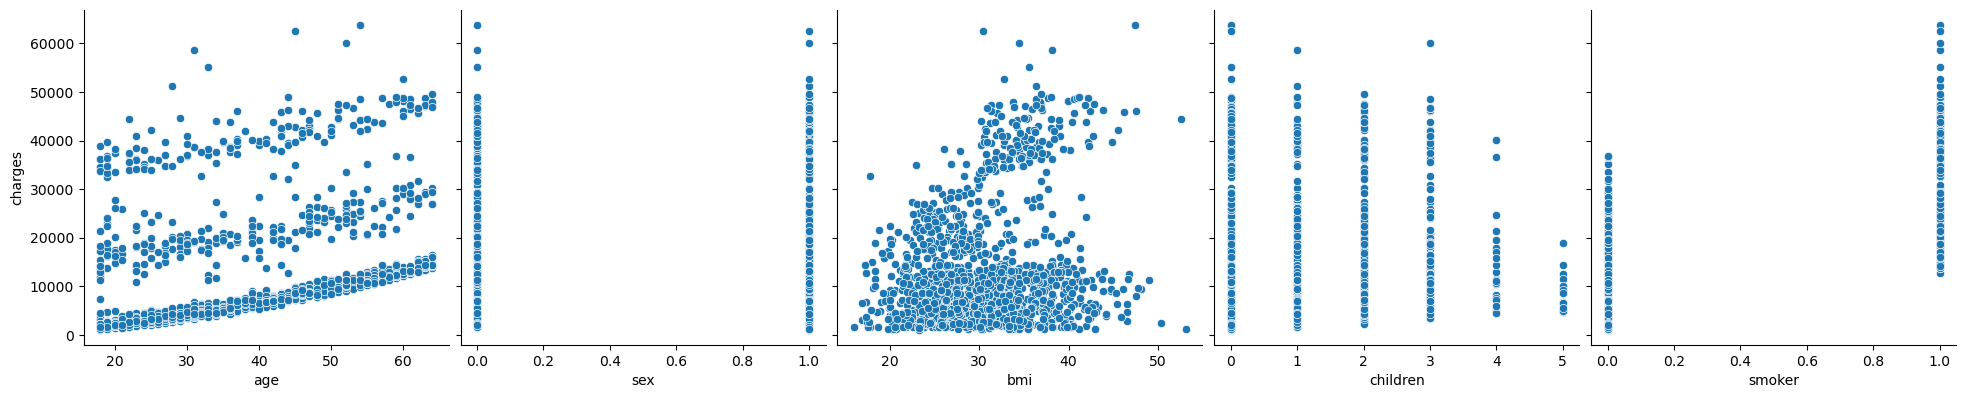

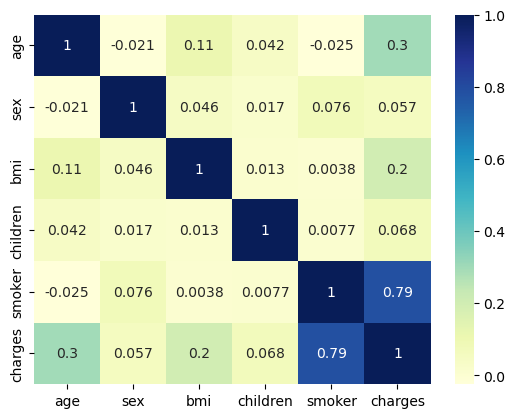

In [8]:
#menampilkan visualisasi data dengan pairplot
sns.pairplot(dataset, x_vars=['age', 'sex', 'bmi', 'children', 'smoker'],
             y_vars='charges', height=4, aspect=1, kind='scatter')
plt.show()

# menampilkan visualisasi korelasi dengan heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()


#### 1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

- Variabel X (fitur) = 'age', 'sex', 'bmi', 'children', 'smoker'
- Variabel y (target) = 'charges'

In [9]:
X = dataset.iloc[:, 0:5].values #memilih fitur untuk variabel X
y = dataset.iloc[:, 5].values #memilih target untuk variabel y

#### 2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

#### 3. Lakukan feature scaling jika diperlukan.

In [10]:
# melakukan scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)  # melakukan penskalaan fitur X
y = sc_y.fit_transform(y.reshape(-1, 1))  # melakukan penskalaan target y

#membagi dataset menjadi data latih dan data uji dengan proporsi 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)


#### 4. Buat model multiple linear reggression menggunakan Scikit-Learn.

In [11]:
# Inisialisasi model Linear Regression
model = LinearRegression()

#### 5. Latih model pada data latih dan lakukan prediksi pada data uji.

In [12]:
# Melatih model pada data latih
model.fit(X_train, y_train)

#melakukan prediksi pada data uji
y_pred = model.predict(X_test)


#### 6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi

In [13]:
# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)

# Menghitung RMSE
rmse = np.sqrt(mse)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

#menampilkan
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-squared:", r2)


MAE: 0.32292126333170235
MSE: 0.22053905897540352
RMSE: 0.4696158632067315
R-squared: 0.7938983522335603
